# EE511 Project 2 Q1

### 1. Simulate sampling uniformly (how many?) on the interval [-3,2]

#### a. Generate a histogram of the outcomes.

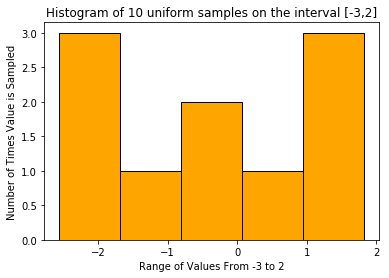

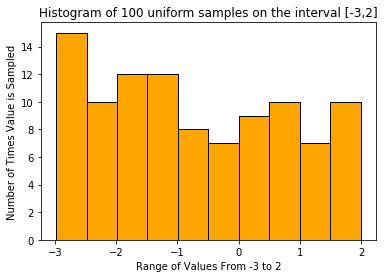

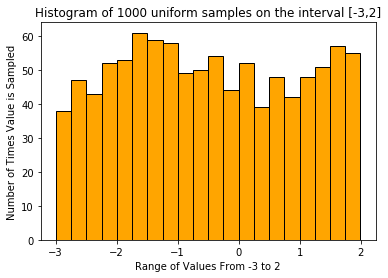

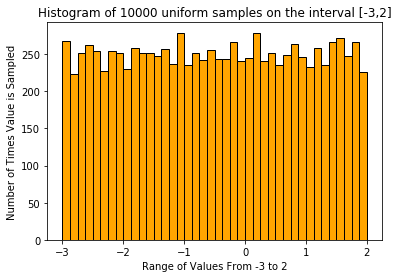

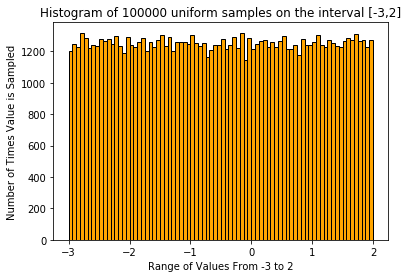

<Figure size 432x288 with 0 Axes>

In [29]:
import numpy as np 
import matplotlib.pyplot as plt

samples = [10, 100, 1000, 10000, 100000]
bins =  [5, 10, 20, 40, 80]


for i in range(0, len(samples)):
    s = np.random.uniform(-3,2, samples[i])
    plt.hist(s, bins[i], edgecolor = 'black', facecolor = 'orange')
    plt.xlabel("Range of Values From -3 to 2")
    plt.ylabel("Number of Times Value is Sampled")
    plt.title("Histogram of {samples} uniform samples on the interval [-3,2]".format(samples=samples[i]))
    plt.show()
    plt.savefig("value{samples}.png".format(samples=samples[i]))

- Looking at the histograms above, it is evident that the sampling distribution becomes more and more uniform as the number of samples increases.
- While it is not very uniform at lower sampling values, on the last graph (where there are 100000 samples), it becomes very close to uniform

#### b. Compute the sample mean and sample variance for your samples.  How do these values compare to the theoretical values?  If you repeat the experiment will you compute a different sample mean or sample variance?

In [30]:
mean_arr = []
variance_arr = []
for i in range(0, len(samples)):
    s = np.random.uniform(-3,2, samples[i])
    mean_arr.append(s.mean())
    variance_arr.append(s.var())
    print("The mean at {samples} samples is: {mean_arr_i}".format(samples=samples[i], mean_arr_i = mean_arr[i]))
    print("The variance at {samples} samples is: {variance_arr_i} \n".format(samples=samples[i], variance_arr_i = variance_arr[i]))

The mean at 10 samples is: -0.026953162502170103
The variance at 10 samples is: 0.7749837918884862 

The mean at 100 samples is: -0.4539903143506753
The variance at 100 samples is: 2.0858090335504 

The mean at 1000 samples is: -0.43365920883413756
The variance at 1000 samples is: 2.0823815085494815 

The mean at 10000 samples is: -0.5100485954513584
The variance at 10000 samples is: 2.0787670747128524 

The mean at 100000 samples is: -0.4994173859199646
The variance at 100000 samples is: 2.0877259538802746 



- The theoretical mean of the uniform closed interval [-3,2] is equal to -0.5. As the number of samples increases, the measured mean approaches this theoretical mean
- The theoretical variance of the uniform closed interval [-3,2] is equal to 25/12, or 2.083333... As the number of samples increases, the measured variance approaches this theoretical variance.

#### c. Compute the bootstrap confidence interval (what width?) for the sample mean and sample standard deviation

In [51]:
from sklearn.utils import resample

resample_mean_array = []
std_dev_arr = []
a = 95 # % confidence interval

for i in range(0,1000): # 1000 resampled means for an s with 1000 uniform samples
    s = np.random.uniform(-3,2, 1000)
    # draw n_samples from array a with replacement
    X = resample(s,n_samples = len(s),replace=True)
    resample_mean_array.append(X.mean())
    std_dev_arr.append(X.std())

resample_mean_array.sort() #sort the 1000 mean values 
std_dev_arr.sort()
# calculate the percentiles
per_1 = np.percentile(resample_mean_array[24], (100-a)/2,interpolation='nearest') #24th index of length 1000 is the 2.5 percentile
per_2 = np.percentile(resample_mean_array[974], (100+a)/2,interpolation='nearest') #974# index of length 1000 is the 97.5 percentile
per_3 = np.percentile(std_dev_arr[24], (100-a)/2,interpolation='nearest') #24th index of length 1000 is the 2.5 percentile
per_4 = np.percentile(std_dev_arr[974], (100+a)/2,interpolation='nearest') #974# index of length 1000 is the 97.5 percentile

print("The bootstrap 95% confidence interval for the sample mean is: [", str(per_1), ",", str(per_2), "]")
print("The bootstrap 95% confidence interval for the standard devation is: [", str(per_3), ",", str(per_4), "]")

The bootstrap 95% confidence interval for the sample mean is: [ -0.627535932743904 , -0.37304170887199906 ]
The bootstrap 95% confidence interval for the standard devation is: [ 1.3834157843417016 , 1.5002098943940743 ]


- The bootstrap 95% confidence interval for the sample mean from 1000 resamples is: [-0.62754 , -0.37304] 
    - This can be compared to the theoretical mean of -0.5.
- The bootstrap 95% confidence interval for the standard devation from 1000 resamples is: [1.38342 , 1.50020] 
    - This can be compared to the theoretical standard deviation of 1.443. This theoretical standard devation comes from the square root of the variance.